# TMNIST Alphabet (94 characters) — In-depth Theory

## 1. Introduction  
TMNIST (Text Modified NIST) Alphabet is an extension of the well-known MNIST dataset. While MNIST consists of handwritten digits (0–9), TMNIST expands this concept to include **94 printable ASCII characters** (letters, digits, punctuation, and symbols), aiming to provide a broader, more diverse set of character representations for machine learning and computer vision applications.  

The 94 characters in TMNIST typically include:  
- Uppercase letters (A–Z)  
- Lowercase letters (a–z)  
- Digits (0–9)  
- Punctuation and symbols (such as `!@#$%^&*()_+-=[]{};':",.<>/?|` and others)  

## 2. Why TMNIST?  
The need for TMNIST arises from the desire to move beyond simple digit recognition and explore deeper applications such as:  
- OCR systems capable of recognizing full text (not just digits).  
- CAPTCHA solving research.  
- Handwriting synthesis models.  
- Style transfer for handwritten text.  
- Improved training of AI systems that understand text in visual forms.  
- Applications in multi-lingual handwritten text recognition (as a base case).  

## 3. Comparison with MNIST  
| Feature           | MNIST                               | TMNIST Alphabet (94 characters)            |  
|------------------|------------------------------------|--------------------------------------------|  
| Number of classes | 10 (digits 0–9)                    | 94 (ASCII printable characters)            |  
| Complexity       | Low — numeric only                  | High — symbols, letters, varying shapes    |  
| Use case         | Digit recognition, simple tasks     | Full-text recognition, multi-purpose OCR   |  
| Dataset size     | Usually 60k train / 10k test images | Similar scale or larger, depending on creator |  

## 4. Data Generation and Collection  
The TMNIST Alphabet dataset is often synthetically generated or collected via:  
- Crowdsourcing handwritten samples of each ASCII character.  
- Rendering characters using handwriting-like fonts and applying random distortions.  
- Combining scanned documents and manual annotation for authenticity.  
- Augmentation techniques: scaling, rotation, shearing, and blurring to simulate real-world variations.  

## 5. Dataset Structure  
The dataset is usually structured into:  
- **Training set**: Handwritten images for each of the 94 characters with thousands of samples each.  
- **Validation set**: A subset for tuning hyperparameters.  
- **Test set**: Clean, separate data for benchmarking models.  

Each image is typically:  
- Grayscale  
- Sized 28x28 pixels or larger  
- Normalized and centered  

## 6. Challenges in TMNIST Recognition  
- **Class imbalance**: Some characters are more common (letters) while others are less frequent (symbols).  
- **Visual similarity**: Characters like `O` (capital o) and `0` (zero) can appear identical.  
- **Shape variation**: Human handwriting differs drastically in stroke thickness, angles, and curvature.  
- **Ambiguity**: Characters like `l` (lowercase L), `I` (uppercase i), and `1` (one) are very close in appearance.  

## 7. Applications  
- **OCR Systems**: Building AI models that can read printed or handwritten text.  
- **Captcha Solvers**: Training models to identify distorted characters used in CAPTCHA challenges.  
- **Robotic handwriting simulation**: Teaching robots or machines to replicate human handwriting by learning stroke patterns.  
- **AI-based font generation**: Models trained on TMNIST can generate new handwriting styles.  
- **Assistive technologies**: Helping visually impaired individuals via real-time text-to-speech systems.  
- **Augmented reality text detection**: Mobile apps recognizing text in images.  

## 8. Preprocessing Techniques  
- **Normalization**: Rescaling pixel values to [0, 1].  
- **Denoising**: Removing background noise from scanned images.  
- **Centering and cropping**: Ensuring the character is well-centered.  
- **Augmentation**: Rotations, flips, Gaussian blur, and elastic distortions to improve generalization.  

## 9. Model Architectures for TMNIST  
- **CNNs (Convolutional Neural Networks)**: Most effective for spatial data.  
- **ResNets and DenseNets**: Deeper architectures with skip connections.  
- **Capsule Networks**: Preserve orientation and spatial hierarchies.  
- **Vision Transformers (ViT)**: A modern approach that uses self-attention for image recognition.  
- **Ensemble Models**: Combining different models for superior accuracy.  

## 10. Evaluation Metrics  
- **Accuracy**: Overall percentage of correct predictions.  
- **Confusion Matrix**: Highlights per-class performance, showing which characters are most often misclassified.  
- **Top-k Accuracy**: Especially useful for ambiguous characters where top-1 accuracy might not be sufficient.  
- **Precision, Recall, F1-score**: To measure performance across imbalanced classes.  

## 11. Potential Research Directions  
- **Style transfer models**: Learning one person's handwriting style and converting typed text to that style.  
- **Domain adaptation**: Adapting models trained on synthetic TMNIST to real-world handwritten text.  
- **Zero-shot learning**: Recognizing characters or symbols not seen during training.  
- **Multi-lingual TMNIST**: Expanding the dataset to include other scripts and languages.  
- **3D handwritten character recognition**: Using pen trajectories to recognize characters from motion data.  


TMNIST Alphabet (94 characters) represents a significant step toward solving more complex OCR problems beyond digit recognition. Its diversity makes it an ideal training ground for robust deep learning models capable of recognizing handwritten text with all its quirks and variations. The research opportunities around TMNIST are vast, from improving model architectures to dataset augmentation and building applications that bridge the gap between human and machine text interpretation.


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_auc_score, accuracy_score
import matplotlib.pyplot as plt

np.random.seed(42)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
data_path = "/kaggle/input/tmnist-alphabet-94-characters/94_character_TMNIST.csv"
data = pd.read_csv(data_path)

In [4]:
data.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,Salsa-Regular,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MouseMemoirs-Regular,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Creepster-Regular,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SeoulNamsan-Light,/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HachiMaruPop-Regular,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
print(f"Number of unique character present in the Dataset: {len(data.labels.unique())}") #Number of Classes

Number of unique character present in the Dataset: 94


In [6]:
X = data.drop(columns=['names','labels']).values
y = data[['labels']].values #Assigning Classes
del data

In [7]:
X = X.astype('u1') #Setting Datatype of Training features for compatibility with Keras Framework
X.dtype

dtype('uint8')

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
y_train = y_train.reshape((-1,))
y_test = y_test.reshape((-1,))

In [9]:
lb = LabelBinarizer()
y_train_label = lb.fit_transform(y_train)
y_test_label = lb.transform(y_test)
print('Train labels dimension:');print(y_train.shape)
print('Test labels dimension:');print(y_test.shape)

Train labels dimension:
(246683,)
Test labels dimension:
(27410,)


In [10]:
X_train, X_test = np.true_divide(X_train, 255), np.true_divide(X_test, 255)

# Deep Neural Networks and Their Role in TMNIST Alphabet Recognition

Deep neural networks (DNNs) are sophisticated computational models that replicate the brain's ability to process information through a complex network of neurons. These networks are characterized by their deep structure, consisting of multiple layers of neurons that enable the extraction of high-level features from raw input data. 

## Importance of Deep Neural Networks in TMNIST Alphabet Recognition

The TMNIST Alphabet dataset presents a unique challenge compared to traditional datasets like MNIST. Instead of only 10 digits, TMNIST contains **94 different handwritten characters**, including letters (both uppercase and lowercase), digits, and punctuation symbols. This significantly increases the complexity of the classification problem. 

DNNs are particularly well-suited to tackle this complexity for several reasons:

### 1. **Hierarchical Feature Extraction**
The depth of DNNs allows them to automatically learn hierarchical features:
- The first few layers detect basic structures such as edges, curves, and lines.
- The middle layers combine these features to detect more complex shapes and patterns, like loops, hooks, and junctions.
- The deeper layers learn abstract representations that can differentiate between characters that look very similar, such as:
  - `O` vs `0`
  - `l` (lowercase L) vs `1` (one) vs `I` (uppercase i)
  - `S` vs `5`
  - `Z` vs `2`

### 2. **Handling High Intra-class Variability**
Handwriting styles vary significantly from person to person. The same character might appear stretched, slanted, or with varying stroke widths. DNNs are robust enough to generalize these variations and still correctly identify the character.  

### 3. **Managing Inter-class Similarity**
Several characters in TMNIST Alphabet are inherently similar in shape. Deep neural networks excel in learning subtle distinctions in pixel distributions that traditional models might miss. Through repeated training and backpropagation, DNNs can fine-tune their filters to pay attention to tiny nuances.

### 4. **Data Augmentation and Regularization**
DNNs work very well with data augmentation techniques, such as random rotations, scaling, and shearing — all of which are highly relevant to the TMNIST dataset. This helps the model learn to recognize characters under different conditions, improving its real-world applicability.  

### 5. **Transfer Learning and Pretraining**
For large and complex datasets like TMNIST Alphabet, pretrained models on similar tasks (such as character or digit recognition) can be fine-tuned to achieve faster convergence and better accuracy. DNN architectures like ResNet, DenseNet, and Vision Transformers have proven to be very effective in these scenarios.

## Challenges in Applying DNNs to TMNIST Alphabet
While DNNs are powerful, they also face challenges:
- **Overfitting**: With 94 classes, the network could memorize rather than generalize. Careful use of dropout, batch normalization, and data augmentation is critical.
- **Computational Demand**: Training deep models on such a large and diverse dataset requires significant computational resources.
- **Ambiguity in Handwriting**: Even with DNNs, there may be certain ambiguous cases that require ensemble learning or confidence-based prediction rejection mechanisms.

## Architectural Choices for TMNIST
- **Convolutional Neural Networks (CNNs)** are the backbone of most TMNIST solutions due to their efficiency in extracting spatial features.
- **Residual Connections (ResNet)** help prevent degradation in deep models, allowing very deep networks to train without vanishing gradients.
- **Dense Connections (DenseNet)** enable stronger gradient flow and reuse of features, which can be beneficial for distinguishing visually similar characters.
- **Capsule Networks** can capture spatial relationships between parts of characters, which is highly beneficial for differentiating between characters with similar shapes.
- **Vision Transformers (ViTs)** can learn long-range dependencies in the spatial domain and might outperform traditional CNNs in large-scale character classification tasks.

## Future Directions for DNNs with TMNIST
- **Few-shot Learning**: Using DNNs to classify new, unseen characters from very few examples.
- **Meta-Learning**: Training networks that can adapt quickly to new handwriting styles.
- **Character Generation**: Leveraging Generative Adversarial Networks (GANs) to generate new samples of rare characters to balance the dataset.


Deep neural networks, with their ability to model complex, non-linear relationships and extract multi-level features, are indispensable for tasks like TMNIST Alphabet classification. They empower models to distinguish between subtle variations in handwritten characters and generalize across different handwriting styles. Their flexibility and scalability make them an essential tool for researchers and engineers working on optical character recognition, document digitization, and handwriting-based AI systems.


In [13]:
dnnmodel = tf.keras.Sequential([
    tf.keras.layers.Dense(1024, input_shape=(X_train.shape[1],), activation='relu'),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(126, activation='relu'),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(y_train_label.shape[1], activation='softmax'),
])

dnnmodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# DNN MODEL

This TensorFlow model is a deep neural network (DNN) designed for multi-class classification, particularly well-suited for the TMNIST Alphabet dataset, which involves recognizing and classifying **94 different handwritten characters**. The model is composed of multiple densely connected (fully connected) layers, interspersed with dropout layers to enhance generalization.

## Model Architecture Explanation

### 1. **Input Layer**
- The model takes flattened 28x28 grayscale images as input, resulting in a vector of size **784 features** per sample.
- This flattening step is crucial to convert 2D pixel grids into a 1D feature array that can be fed into dense layers.

### 2. **First Dense Layer (1024 Neurons)**
- The first dense layer is large, with **1024 neurons**, designed to capture a broad set of patterns and complex feature interactions from the raw pixel input.
- It uses the **ReLU activation function** to introduce non-linearity, enabling the network to model complex relationships between input features.

### 3. **Subsequent Dense Layers (512, 256, 126 Neurons)**
- Each successive dense layer has fewer neurons (512 → 256 → 126), progressively narrowing down the feature space.
- This design choice helps the model in compressing and refining the learned representations, leading to higher-level abstractions.
- The decreasing neuron count acts like a funnel, filtering out irrelevant features and retaining those most pertinent to character classification.

### 4. **Dropout Layers (15%)**
- After each dense layer, a **dropout layer** with a rate of **0.15 (15%)** is applied.
- Dropout randomly sets the output of neurons to zero during training, which helps:
  - Prevent overfitting.
  - Encourage the network to learn redundant representations.
  - Improve robustness by making the model less sensitive to small variations in input.

### 5. **Output Layer**
- The final dense layer has **94 neurons**, corresponding to the **94 classes** of the TMNIST Alphabet.
- This layer uses the **softmax activation function**, converting raw output logits into class probabilities.
- The model will output a probability distribution over all classes, where the highest probability determines the predicted class.

---

## Why This Architecture Works for TMNIST Alphabet

### 1. **Large Initial Dense Layers for Complex Feature Learning**
- The large initial layers (1024 and 512 neurons) are capable of learning intricate details from handwritten characters, which is critical for distinguishing subtle differences between visually similar characters (e.g., `0` vs. `O` or `I` vs. `l`).

### 2. **Gradual Dimensional Reduction**
- As the data moves through successive layers, the gradual reduction in neuron count helps in discarding noise and irrelevant details, focusing on the most distinguishing features of each character.

### 3. **Dropout for Generalization**
- The TMNIST dataset can contain variations in stroke thickness, writing style, and distortions. Dropout helps the model become less reliant on specific patterns and instead learn generalizable features that work across different handwriting styles.

### 4. **Softmax Output Layer**
- Given the multi-class nature of the TMNIST Alphabet classification, the softmax function is ideal for generating probabilistic predictions across 94 classes, allowing confidence-based decision-making.

---

## Loss Function and Optimizer

- The model is trained using **categorical cross-entropy loss**, which is suitable for multi-class classification tasks.
- Optimizers like **Adam** or **RMSProp** are commonly used, as they dynamically adjust learning rates during training and are known to perform well on complex datasets like TMNIST.

---

## Regularization and Training Tips
- **Early stopping**: To prevent overfitting, monitor the validation loss and stop training when performance plateaus or begins to decline.
- **Learning rate scheduling**: Start with a higher learning rate and decay it over epochs to fine-tune weights.
- **Batch normalization** (if added): Can further stabilize and speed up training.

---

## Potential Improvements
- **Batch Normalization Layers** between dense layers to stabilize gradients.
- **L2 regularization** for additional control against overfitting.
- **Hyperparameter tuning** (varying layer sizes, dropout rates, learning rates) using tools like Keras Tuner or Optuna.
- **Ensemble modeling** by training multiple DNNs and combining predictions.

---


The described DNN model architecture is well-structured for handling the high-dimensional and highly complex classification task posed by the TMNIST Alphabet. Its deep, funnel-like structure with regularization layers allows it to learn fine-grained features of handwritten characters, making it an essential architecture for robust character recognition in practical OCR systems and handwriting analysis applications.


In [14]:
dnn_result = dnnmodel.fit(X_train, y_train_label, epochs=10, batch_size=128, verbose=1, validation_split=0.1)

Epoch 1/10
1735/1735 ━━━━━━━━━━━━━━━━━━━━ 45s 25ms/step - accuracy: 0.6774 - loss: 1.2271 - val_accuracy: 0.8593 - val_loss: 0.4265
Epoch 2/10
1735/1735 ━━━━━━━━━━━━━━━━━━━━ 42s 24ms/step - accuracy: 0.8553 - loss: 0.4507 - val_accuracy: 0.8754 - val_loss: 0.3781
Epoch 3/10
1735/1735 ━━━━━━━━━━━━━━━━━━━━ 43s 24ms/step - accuracy: 0.8707 - loss: 0.3874 - val_accuracy: 0.8834 - val_loss: 0.3413
Epoch 4/10
1735/1735 ━━━━━━━━━━━━━━━━━━━━ 81s 24ms/step - accuracy: 0.8833 - loss: 0.3485 - val_accuracy: 0.8889 - val_loss: 0.3359
Epoch 5/10
1735/1735 ━━━━━━━━━━━━━━━━━━━━ 83s 25ms/step - accuracy: 0.8903 - loss: 0.3259 - val_accuracy: 0.8944 - val_loss: 0.3161
Epoch 6/10
1735/1735 ━━━━━━━━━━━━━━━━━━━━ 80s 24ms/step - accuracy: 0.8968 - loss: 0.3030 - val_accuracy: 0.8952 - val_loss: 0.3152
Epoch 7/10
1735/1735 ━━━━━━━━━━━━━━━━━━━━ 81s 23ms/step - accuracy: 0.9001 - loss: 0.2904 - val_accuracy: 0.8978 - val_loss: 0.3076
Epoch 8/10
1735/1735 ━━━━━━━━━━━━━━━━━━━━ 44s 25ms/step - accuracy: 0.9045 -

In [15]:
score = dnnmodel.evaluate(X_test, y_test_label, verbose = 0)
print(f"Accuracy of DNN on Test Dataset is :{round(score[1],4)*100}%")

Accuracy of DNN on Test Dataset is :90.63%


In [16]:
X_train = X_train.reshape(-1,28,28,1).astype('float32') 
X_test = X_test.reshape(-1,28,28,1).astype('float32')

# Convolutional Neural Networks

Convolutional Neural Networks (CNNs) are a class of deep neural networks, highly effective for image recognition tasks. They automatically and adaptively learn spatial hierarchies of features from image data. CNNs use convolutional layers to process data in a grid pattern, such as pixels in images, making them particularly suitable for tasks like image classification, where capturing the spatial relationships between pixels is crucial. This capability to learn from the structure and features of images makes CNNs a powerful tool for many computer vision applications.

CNNs are particularly useful for the TMNIST Alphabet dataset due to their ability to capture spatial relationships between pixels, essential for recognizing and classifying the diverse handwritten characters in the dataset. By automatically learning the most relevant features for classification tasks, CNNs can significantly improve accuracy in recognizing the nuanced differences between similar characters, making them a powerful tool for optical character recognition (OCR) applications involving complex character sets.

## CNN Architecture Components in Detail

### 1. **Convolutional Layers**
- Convolutional layers are the core building blocks of CNNs.
- These layers apply multiple learnable filters (kernels) that scan across the input image to detect local features such as edges, curves, corners, and textures.
- In TMNIST Alphabet classification, initial layers may learn to detect simple features like horizontal and vertical lines, while deeper layers learn complex character-specific patterns.

### 2. **Activation Functions**
- The ReLU (Rectified Linear Unit) activation function is commonly applied after each convolution to introduce non-linearity, enabling the network to model complex relationships.
- ReLU also helps in speeding up training and avoiding vanishing gradient issues.

### 3. **Pooling Layers**
- Pooling layers, usually max-pooling, are used to reduce the spatial dimensions of feature maps.
- This process:
  - Reduces computational complexity.
  - Makes the network invariant to small translations or distortions.
  - Retains the most prominent features while ignoring minor noise — especially helpful when dealing with handwriting variability in TMNIST.

### 4. **Fully Connected (Dense) Layers**
- After convolutional and pooling layers, the feature maps are flattened and passed to dense layers.
- These layers integrate the learned spatial features to perform classification by combining multiple high-level patterns.

### 5. **Dropout Layers**
- Dropout is often used in CNN architectures to prevent overfitting by randomly deactivating a set of neurons during training.
- Given the diverse nature of the TMNIST Alphabet dataset, dropout enhances generalization across different handwriting styles.

### 6. **Softmax Output Layer**
- The final dense layer uses softmax activation to output a probability distribution over the 94 character classes.
- This probabilistic output allows the model to express confidence in each classification.

---

## Advantages of CNNs for TMNIST Alphabet Recognition

- **Spatial Invariance**: CNNs learn features that are invariant to small shifts, rotations, and deformations, common in handwritten characters.
- **Parameter Efficiency**: Convolutional layers reuse weights, making the model more efficient and less prone to overfitting compared to fully connected deep neural networks.
- **Automatic Feature Extraction**: CNNs do not require manual feature engineering; they learn relevant features directly from pixel data.
- **Hierarchical Feature Learning**: Lower layers learn simple structures, while deeper layers capture complex shapes that distinguish characters in TMNIST.

---

## Typical CNN Architecture for TMNIST

A commonly used architecture for TMNIST might consist of:
- Input Layer (28x28 grayscale images)
- Convolutional Layer (32 filters, 3x3 kernel, ReLU)
- MaxPooling Layer (2x2)
- Convolutional Layer (64 filters, 3x3 kernel, ReLU)
- MaxPooling Layer (2x2)
- Flatten Layer
- Dense Layer (256 neurons, ReLU)
- Dropout Layer (rate = 0.5)
- Output Dense Layer (94 neurons, softmax)

---

## Challenges When Applying CNNs to TMNIST
- **Similarity Between Characters**: CNNs need to be deep enough to learn subtle variations between characters such as `O` and `0` or `S` and `5`.
- **Handwriting Variability**: Different writing styles and distortions require robust feature learning and large datasets.
- **Overfitting Risk**: Due to the diversity of classes, careful regularization and dropout application are critical.

---

## Potential Improvements for CNN Models on TMNIST
- **Batch Normalization**: Adding batch normalization layers can improve stability and training speed.
- **Data Augmentation**: Applying rotations, scaling, and elastic distortions to increase dataset variability.
- **Residual Blocks (ResNet-inspired)**: These help build deeper networks without degradation issues.
- **Attention Mechanisms**: Adding spatial attention modules to help the model focus on relevant portions of the character image.

---


CNNs have proven to be the backbone of image classification systems, and their ability to automatically learn spatial features makes them ideally suited for recognizing complex handwritten characters in the TMNIST Alphabet dataset. By capturing subtle pixel-level variations and integrating them into a hierarchical representation, CNNs significantly enhance the accuracy and reliability of OCR systems and pave the way for sophisticated handwriting recognition technologies.


In [19]:
cnnmodel = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(4,4),input_shape = (28,28,1),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64,(4,4),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(y_train_label.shape[1], activation='softmax')
])

cnnmodel.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

# CNN Model
This TensorFlow model is a Convolutional Neural Network (CNN) designed for image classification. It starts with two convolutional layers that extract features from the input images (28x28 pixels, single channel) using 32 and then 64 filters, respectively. Each convolutional layer is followed by a max pooling layer to reduce dimensionality and enhance feature detection. After flattening the output to a vector, a dropout layer is applied to reduce overfitting. A dense layer with 128 neurons is used for further processing, followed by another dropout layer. The final dense layer, with a softmax activation, outputs class probabilities.

In [20]:
cnnmodel.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 25, 25, 32)     │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 9, 9, 64)       │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 94)             │        12,126 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 176,702 (690.24 KB)

 Trainable params: 176,702 (690.24 KB)

 Non-trainable params: 0 (0.00 B)

The model summary outlines a CNN architecture designed for image classification, comprising convolutional, max pooling, flattening, dropout, and dense layers. The first convolutional layer with 32 filters processes the input, followed by max pooling to reduce size. A second convolutional layer with 64 filters further extracts features, succeeded by another max pooling layer. After flattening to a vector, dropout layers reduce overfitting. Two dense layers finalize the model, with the last outputting 94 class probabilities. Total trainable parameters are 176,702, indicating the model's complexity and capacity for learning.

In [21]:
cnn_result = cnnmodel.fit(X_train, y_train_label, validation_split=0.1, epochs=10, batch_size=128, verbose=1)

Epoch 1/10
1735/1735 ━━━━━━━━━━━━━━━━━━━━ 96s 55ms/step - accuracy: 0.6701 - loss: 1.2779 - val_accuracy: 0.8847 - val_loss: 0.3686
Epoch 2/10
1735/1735 ━━━━━━━━━━━━━━━━━━━━ 93s 54ms/step - accuracy: 0.8741 - loss: 0.3907 - val_accuracy: 0.9087 - val_loss: 0.2930
Epoch 3/10
1735/1735 ━━━━━━━━━━━━━━━━━━━━ 143s 55ms/step - accuracy: 0.9014 - loss: 0.3085 - val_accuracy: 0.9223 - val_loss: 0.2497
Epoch 4/10
1735/1735 ━━━━━━━━━━━━━━━━━━━━ 140s 53ms/step - accuracy: 0.9155 - loss: 0.2642 - val_accuracy: 0.9238 - val_loss: 0.2364
Epoch 5/10
1735/1735 ━━━━━━━━━━━━━━━━━━━━ 141s 53ms/step - accuracy: 0.9218 - loss: 0.2429 - val_accuracy: 0.9308 - val_loss: 0.2166
Epoch 6/10
1735/1735 ━━━━━━━━━━━━━━━━━━━━ 92s 53ms/step - accuracy: 0.9284 - loss: 0.2188 - val_accuracy: 0.9327 - val_loss: 0.2081
Epoch 7/10
1735/1735 ━━━━━━━━━━━━━━━━━━━━ 150s 58ms/step - accuracy: 0.9306 - loss: 0.2084 - val_accuracy: 0.9320 - val_loss: 0.2084
Epoch 8/10
1735/1735 ━━━━━━━━━━━━━━━━━━━━ 92s 53ms/step - accuracy: 0.93

In [22]:
score = cnnmodel.evaluate(X_test, y_test_label, verbose = 0)
print(f"Accuracy of CNN on Test Dataset is :{round(score[1],4)*100}%")

Accuracy of CNN on Test Dataset is :93.89999999999999%


In [23]:
predictions = cnnmodel.predict(X_test)

857/857 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step


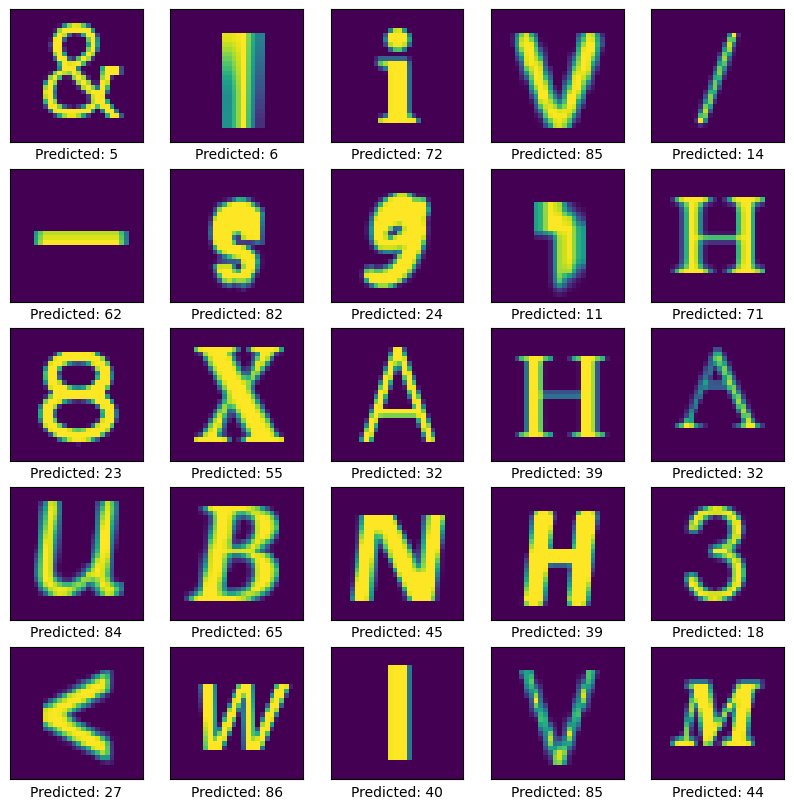

In [24]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap='viridis')
    plt.xlabel('Predicted: '+str(np.argmax(predictions[i])))
plt.show()

In [25]:
def plot_performance(data):
    fig, ax = plt.subplots(1,2 , figsize = (20,7))
    # summarize history for accuracy
    ax[0].plot(data.history['accuracy'])
    ax[0].plot(data.history['val_accuracy'])
    ax[0].set_title('model accuracy')
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")
    ax[0].legend(['train', 'test'], loc='upper left')

    # summarize history for loss
    ax[1].plot(data.history['loss'], label =['loss'])
    ax[1].plot(data.history['val_loss'] ,label =['val_loss'])
    ax[1].set_title('model loss')
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Loss")
    ax[1].legend(['train', 'test'], loc='upper left')
    plt.show()

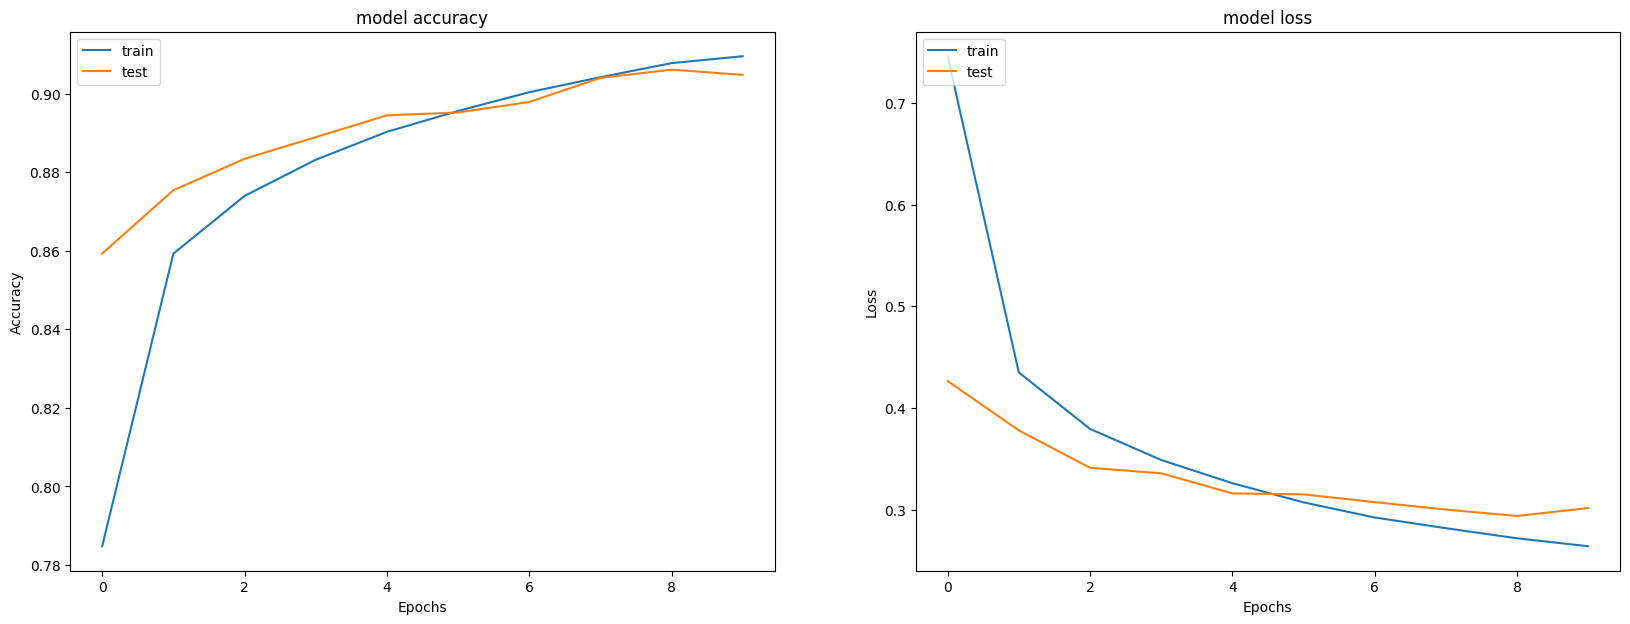

In [26]:
plot_performance(dnn_result)

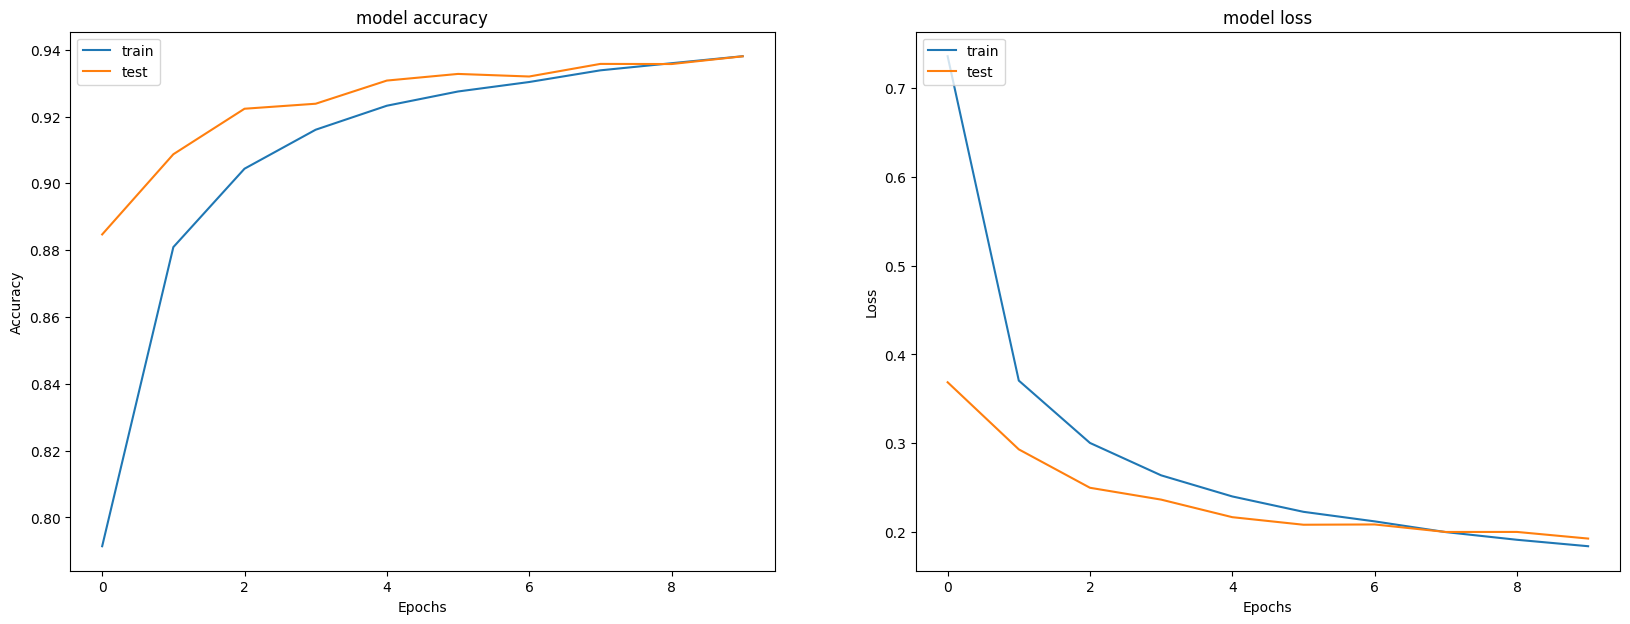

In [27]:
plot_performance(cnn_result)

# Conclusion

The provided graphs depict the training process of a machine learning model over a number of epochs. On the left, the **'model accuracy'** graph shows both the training and testing accuracy. Both curves rise sharply and begin to plateau, indicating that the model is learning and its performance on both the training and test sets is improving. However, the training accuracy continues to be slightly higher than the test accuracy, which could suggest some degree of **overfitting**.

On the right, the **'model loss'** graph shows the loss decreasing rapidly, then slowly flattening out, which is typical during training as the model begins to converge and improve its predictions. Similar to the accuracy graph, the training loss is lower than the test loss, which further suggests the model may be overfitting to the training data.

Overall, the graphs suggest that the model is learning effectively from the data. To mitigate potential overfitting, one could consider strategies such as:
- **Early stopping**: Halt training when the validation loss begins to rise.
- **Regularization**: Use L2 regularization or dropout layers to prevent the model from becoming too reliant on certain features.
- **Data augmentation**: Increase dataset diversity through transformations, helping the model generalize better.
- **Cross-validation**: Ensure the model's performance holds consistently across multiple validation folds.

---

The **accuracy versus epochs** and **loss versus epochs** graphs also demonstrate that **Convolutional Neural Networks (CNNs)** outperform **Dense Neural Networks (DNNs)** in classifying two-dimensional arrays like images or matrices. This superiority stems from CNNs’ ability to:
- Extract local features through convolutional filters.
- Maintain spatial hierarchies of information without losing structural data.
- Learn translation-invariant features critical for pattern recognition.

If the arrays are flattened into one-dimensional vectors, as done in DNNs, essential spatial relationships between pixels are lost. For instance, distinguishing between characters or digits like `6` and `8` depends heavily on spatial curves and closed loops — features that might be diluted or distorted when flattened.

Therefore, for classification tasks involving **high-dimensional structured data** (such as handwriting datasets like the TMNIST Alphabet), CNNs are the preferred choice. They are inherently designed to:
- Preserve and exploit spatial patterns.
- Reduce the number of parameters through weight sharing.
- Achieve higher accuracy with fewer layers compared to fully connected architectures.

---

### Key Takeaways:
- The model shows good learning progress but has signs of slight overfitting.
- Strategies like dropout, regularization, and data augmentation can further enhance generalization.
- CNNs consistently outperform DNNs for image-based tasks due to their ability to learn spatial features effectively.
- For future experiments with complex datasets like TMNIST Alphabet, exploring deeper CNN architectures, residual networks (ResNet), and attention-based models could yield even better performance.

---

In conclusion, understanding the strengths of model architectures in relation to the dataset structure is crucial. CNNs are naturally suited for 2D data like handwritten characters, and their ability to capture intricate spatial relationships makes them a critical component in advanced OCR systems and character recognition applications.




# References 
TensorFlow Core Team. "Convolutional Neural Network (CNN)." TensorFlow Core v2.16.1, TensorFlow. https://www.tensorflow.org/tutorials/images/cnn​ (TensorFlow)​.

Sharma, Aditya. "Python Convolutional Neural Networks (CNN) with TensorFlow Tutorial." DataCamp, DataCamp. https://www.datacamp.com/community/tutorials/convolutional-neural-networks-python​ (Learn R, Python & Data Science Online)​.

Run AI. "TensorFlow CNN: Building Your First CNN with TensorFlow." Run AI. https://www.run.ai/guides/deep-learning-frameworks/tensorflow-cnn​ (RunAI)​.

Notebook by SwapnilBhasgauri21 in TMNIST NOTEBOOK DATA

# LICENSES
MIT License

Copyright (c) 2024 chinm4y

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.